# Regressão Logística e Métricas de Avaliação
---

<img src="https://selecao-stg.letscode.com.br/favicon.png" style="position: absolute; top: 0.75rem; right: 2rem; width: 50px" />

### Roteiro da Aula

1. Introdução    
    a. Resolver um problema de classificação com Regressão Linear?    
    b. A matemática por trás da Regressão Logística
2. Aplicando a Regressão Logística nos dados do Titanic  
    a. Analisando os coeficientes da Regressão Logística  
    b. Adicionando mais variáveis explicativas
3. Métricas de Avaliação  
    a. Acurácia  
    b. Matriz de Confusão  
        - Precisão  
        - Sensibilidade (Recall)  
        - Especificidade  
    c. ROC    
        - Curve  
        - Score/Gini  

### Importações

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LinearRegression

sns.set()

### Importando o Dataset

In [2]:
df = pd.read_csv('https://s3-sa-east-1.amazonaws.com/lcpi/5729687e-ae14-4978-8cd7-7ef18277813d.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Introdução Intuitiva

Uma Regressão Linear Múltipla buscar entender os relacionamentos entre diversas variáveis explicativas (x) com a variável resposta (y), que, de forma matemática, busca achar os coeficientes ($\beta_n$) da equação:

$$y = \beta_{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + ... + \beta_{n} x_{n}$$

No caso das Regressões Lineares, a variável resposta é contínua. Dessa forma, ao tentar estimar o preço de um imóvel usando sua área em $m^2$, quantidade de quartos e quantidade de banheiros, a Regressão Linear pode ser uma boa opção.

Porém, como proceder nos casos que a variável resposta não é contínua, mas binária? Imagine que, dado o valor pago por um passageiro em uma cabine no Titanic, queremos saber se ele sobreviveu ou não? 

Matematicamente, podemos representar a sobrevivência como 1 e a não sobrevivência como 0, e a partir daí fazer a modelagem usando Regressão Linear. Entretanto, ao modelar dessa forma, não estamos restringindo o valor que a variável resposta pode assumir; logo, valores estranhos podem aparecer, como no gráfico.

In [4]:
X = df[['Fare']]
y = df['Survived']

lr = LinearRegression()
lr.fit(X, y)

y_pred = lr.predict(X)

y_pred[:5]

array([0.32096585, 0.4822988 , 0.32266652, 0.43648568, 0.32298146])

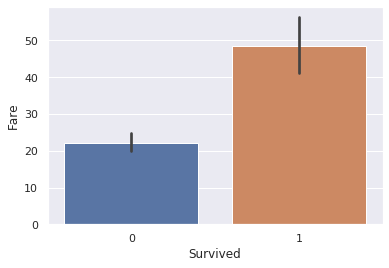

In [5]:
sns.barplot(data=df, x='Survived', y='Fare')

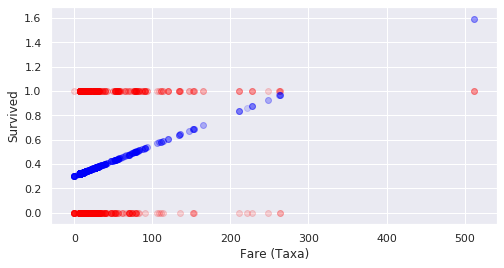

In [6]:
plt.figure(figsize=(8, 4))
plt.scatter(df['Fare'], df['Survived'], alpha=0.15, color='red')
plt.scatter(df['Fare'], y_pred, color='blue', alpha=0.15)
plt.xlabel('Fare (Taxa)')
plt.ylabel('Survived')
plt.show()

O eixo Y indica se a pessoa sobreviveu (1) ou não (0). Já o eixo X indica o valor pago pela cabine. É possível perceber que quanto maior o valor pago pela cabine, maior a chance de sobreviver. Porém, chance é sinônimo de probabilidade (estatísticos, me perdoem), que é um valor entre 0 e 1. Dessa forma, o ponto azul na extremidade superior direita nos dá uma intuição de algo errado. Probabilidade de sobrevivência de 1,6? 

A variável resposta predita ao utilizar Regressão Linear para modelar o problema estará vaga, num espectro de valores infinitamente amplo. Nesse cenário de variável resposta binária, se faz necessária a aplicação de algumas transformações para que possamos ajustar um modelo de forma linear.

Para isso, utilizaremos o logito (logit), que é uma função que mapeia a probabilidade de pertencimento a uma classe com amplitude de $\pm \infty$ , ao invés de 0 e 1. Matematicamente, é uma função do tipo $f(x) = \log(\frac{x}{1-x})$ , com o gráfico descrito abaixo. Seu gráfico está descrito na imagem a seguir e podemos vê-la sendo limitada com assíntotas verticais em 0 e 1.

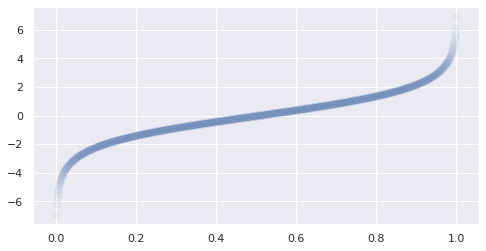

In [7]:
x = np.arange(0.001, 1, 0.001)
y = np.log(x / (1 - x))

plt.figure(figsize = (8, 4))

plt.scatter(x, y, alpha = 0.05, s=50)

Porém, na forma como o gráfico está descrito, o que está sendo limitado é o eixo X, que **no padrão seguido nas aulas** é a nossa variável explicativa. Entretanto, o que precisamos é que a nossa variável resposta, eixo Y, esteja limitada entre 0 e 1. Dessa forma, precisamos do inverso do logito, que é a função logística, dada por $f(x) = \frac{1}{1 + e^{-x}}$. Aplicando a função logística, temos:

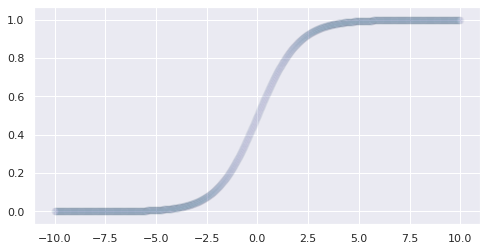

In [8]:
x = np.arange(-10, 10, 0.01)
y = 1/(1 + np.exp(-x))

plt.figure(figsize = (8, 4))

plt.scatter(x, y, alpha = 0.01, s=50)

Como queremos que nossa variável reposta seja uma probabilidade $p$ entre 0 e 1 (redundância proposital), podemos aplicar a função logística na função de Regressão Linear, obtendo:

$$y = p = \frac{1}{1 + e^{-(\beta_{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + ... + \beta_{n} x_{n})}}$$

Porém, seria interessante que mantivéssemos a equação em um formato linear, como é na Regressão Linear, afinal, única coisa que queremos modificar é a resposta. Para tirar a função exponencial do denominador da função, usaremos chances ($Odds$) ao invés de probabilidades. Chamaremos de $Odds$ a proporção entre sobrevivência (1) e não sobrevivência (0), ou, em outras palavras, a probabilidade de um evento ocorrer sobre a probabilidade dele não ocorrer. Representamos da seguinte forma:

$$Odds(Y = 1) = \frac{p}{1 - p} $$

**Para pensar:** observando apenas a variável resposta (*Survived*) do Titanic, quais são as chances de sobrevivência? Esses valores sempre estarão compreendidos entre 0 e 1?

- 1: sobreviveu  
- 0: não sobreviveu  

In [9]:
df.Survived.value_counts(True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

Chances de sobrevivência:

In [10]:
0.383838 / (1 - 0.383838)

0.6229498086542176

Chances de não sobrevivência:

In [11]:
0.616162 / (1 - 0.616162)

1.6052657631604998

**Para pensar:** o que obtemos ao isolar o $p$ na função da $Odds$?

$$
p = \frac{Odds}{Odds + 1}
$$

Dessa forma, já podemos igualar a duas funções $p$. Porém, antes disso, vamos multiplicar a primeira por $\frac{e^{(\beta_{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + ... + \beta_{n} x_{n})}}{e^{(\beta_{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + ... + \beta_{n} x_{n})}}$. 

**Para pensar:** o que obtemos?

$$
y = p = \frac{e^x}{1 + e^x}
$$

em que,

$$
    x = \beta_{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + \dots + \beta_{n} x_{n}
$$

**Para pensar:** e agora, igualando...

$$
Odds = e^x
$$

In [12]:
e = np.e

In [13]:
e

2.718281828459045

$$
    \ln{(Odds)} = \beta_{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + ... + \beta_{n} x_{n}
$$

Dessa forma, estamos mapeando em chances qualquer valor $(-\infty, \infty)$, usando um modelo linear para prever essa probabilidade. Por sua vez, podemos mapear esse valor para definir a sobrevivência ou não sobrevivência a partir de um ponto de corte: qualquer valor de probabilidade acima de 0.5, por exemplo, pode ser definido como sobrevivência.

### Aplicando uma Regressão Logística aos dados do Titanic

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
X = df[['Fare']]
y = df['Survived']

clf = LogisticRegression()
clf.fit(X, y)

y_proba = clf.predict_proba(X)

y_proba[:5]

array([[0.69659638, 0.30340362],
       [0.46457191, 0.53542809],
       [0.69442404, 0.30557596],
       [0.53354334, 0.46645666],
       [0.69402081, 0.30597919]])

In [16]:
!pip install mlxtend

     |████████████████████████████████| 1.3 MB 2.1 MB/s eta 0:00:01


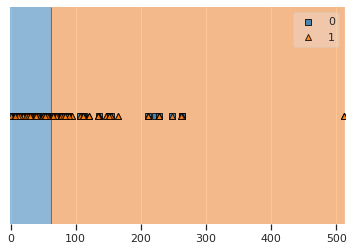

In [17]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X.values, y.values, clf=clf)

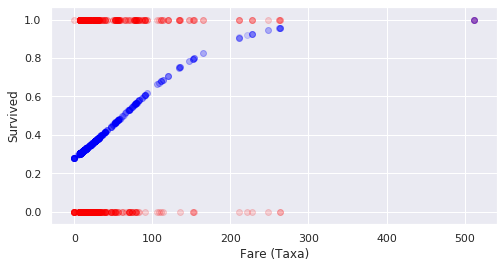

In [18]:
plt.figure(figsize=(8, 4))
plt.scatter(df['Fare'], df['Survived'], alpha=0.15, color='red')
plt.scatter(df['Fare'], y_proba[:, 1], color='blue', alpha=0.15)
plt.xlabel('Fare (Taxa)')
plt.ylabel('Survived')
plt.show()

### Visualizando a predição feita com a Regressão Logística

In [19]:
y_pred = clf.predict(X)

y_pred[:5]

array([0, 1, 0, 0, 0])

In [20]:
y[:5].values

array([0, 1, 1, 1, 0])

### Coeficientes da Regressão Logística

Trazendo para o exemplo do Titanic, podemos visualizar os coeficientes da equação. 

In [21]:
clf.intercept_

array([-0.94131796])

In [22]:
clf.coef_

array([[0.01519666]])

**O que está errado na frase?**

Ao aumentar um dólar na taxa paga no Titanic, estaremos aumentando a nossa chance de sobrevivência em 0.01 vezes.

**Frase correta**

Ao aumentar um dólar na taxa paga no Titanic, estaremos aumentando o **logaritmo das chances** de sobrevivência em 0.01 vezes.

**Para pensar:** assim, podemos interpretar que cada dólar a mais pago na cabine do Titanic aumenta as chances de sobrevivência do passageiro em quanto?

In [23]:
odds = np.exp(0.01519666 - 0.94131796)

In [24]:
# calculando a probabilidade
p = odds / (odds + 1)
p

0.28371228076820015

Até agora estamos modelando as chances/probabilidades de sobrevivência em termos do valor pago na cabine. Porém, da mesma forma que na Regressão Linear, na Regressão Logística também podemos fazer uma análise multivariada e modelar com $N$ variáveis. Dessa forma, a vantagem da interpretabilidade do modelo fica ainda mais forte.

**Para pensar:** o que é mais importante na determinação das chances de sobrevivência do passageiro: o preço pago pela cabine, o sexo, a quantidade de irmãos ou parentes?

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
df['Sex'] = df['Sex'].map({
    'male': 0,
    'female': 1
})

In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [28]:
X = df[['Fare', 'Sex', 'SibSp', 'Parch']]
y = df['Survived']

clf = LogisticRegression()
clf.fit(X, y)

y_proba = clf.predict_proba(X)

y_proba[:5]

array([[0.87049392, 0.12950608],
       [0.17081309, 0.82918691],
       [0.26872206, 0.73127794],
       [0.21162194, 0.78837806],
       [0.82493144, 0.17506856]])

In [29]:
y_pred = clf.predict(X)
y_pred[:5]

array([0, 1, 1, 1, 0])

In [30]:
y[:5].values

array([0, 1, 1, 1, 0])

In [31]:
y_pred[-5:]

array([0, 1, 1, 0, 0])

In [32]:
y[-5:].values

array([0, 1, 0, 1, 0])

In [33]:
clf.coef_

array([[ 0.01455727,  2.55305829, -0.34356449, -0.18592115]])

In [34]:
pd.DataFrame(data=clf.coef_, columns=X.columns)

,Fare,Sex,SibSp,Parch
0,0.014557,2.553058,-0.343564,-0.185921


**Para pensar:** E se a gente adicionar a variável idade? Como ficam as importâncias das variáveis?

In [35]:
df['Age'].isnull().sum()

177

In [36]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [37]:
X = df[['Fare', 'Sex', 'SibSp', 'Parch', 'Age']]
y = df['Survived']

clf2 = LogisticRegression()
clf2.fit(X, y)

y_proba2 = clf2.predict_proba(X)

y_proba2[:5]

array([[0.85847418, 0.14152582],
       [0.19058656, 0.80941344],
       [0.25692161, 0.74307839],
       [0.22939487, 0.77060513],
       [0.83940633, 0.16059367]])

In [38]:
y_pred2 = clf2.predict(X)
y_pred2[:5]

array([0, 1, 1, 1, 0])

In [39]:
y[:5].values

array([0, 1, 1, 1, 0])

### Atividade

Plot a decision region considerando apenas a coluna `Fare` e a coluna `Age`.

## Na aula anterior...

1. O que é regressão logística?

Um modelo de classificação baseado na função logística, que utiliza a função da regressão linear como expoente da função.

- Fácil interpretação: por meio dos coeficientes da regressão logística é possível analisar o peso de cada variável sobre o logarítmo da odds de ser positivo. O sinal também é importante, porque por meio dele é possível interpretar se a varíavel influencia no aumento das chances (coeficiente positivo) ou na redução das chances (coeficiente negativo) de ser positivo (1).


2. Acurácia

A taxa de acerto.

## Métricas de Avaliação de Modelos

**O modelo melhorou ao utilizar mais variáveis?**

### Acurácia

Também conhecida como taxa de acerto, essa medida de desempenho traz a proporção de acertos sobre o total de observações. Assumindo que, dado um conjunto de variáveis explicativas $x$ associados a um conjunto de variável resposta $y$ um modelo $M$ foi treinado, temos que a acurácia do modelo $M$ ($ac(M)$) pode ser descrita matematicamente como:

$$ac({M}) = \frac{1}{n}\sum_{i = 1}^{n}{I(y_{i} = M(x_i)) }$$

A taxa de acerto é um número limitado entre 0 e 1. Quanto maior for o seu valor, melhor é o modelo $M$.

De forma similar, podemos obter a taxa de erro com:

$$err({M}) = 1 - ac(M)$$

Nesse caso, quanto menor a taxa de erro, melhor o modelo $M$.


**Como calcular a acurácia do lr_1 e do lr_2?**

In [42]:
# Calculando manualmente (modelo com apenas o Fare)
y_pred = clf.predict(X)
y_pred[:5]

ValueError: X has 5 features per sample; expecting 4

In [ ]:
y[:5].values

In [ ]:
qtd_acertos = (y == y_pred).sum()

In [ ]:
total_predicoes = len(y)

In [ ]:
qtd_acertos / total_predicoes

In [ ]:
# Calculando manualmente (modelo com último modelo que criamos)
y_pred2[:5]

In [ ]:
qtd_acertos = (y == y_pred2).sum()
total_predicoes = len(y)

qtd_acertos / total_predicoes

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y, y_pred) # Primeiro modelo (apenas o Fare)

In [ ]:
accuracy_score(y, y_pred2) # Modelo mais completo

**Para pensar:** Faça um modelo usando `'Pclass', 'Sex', 'SibSp', 'Fare'`, um segundo modelo sem o `'Fare'` e os compare. O que acontece?

In [ ]:
X = df[['Pclass', 'Sex', 'SibSp', 'Fare']]
y = df['Survived']

clf3 = LogisticRegression()
clf3.fit(X, y)

y_proba3 = clf3.predict_proba(X)
y_pred3 = clf3.predict(X)

y_proba3[:5]

In [ ]:
accuracy_score(y, y_pred3)

In [ ]:
X = df[['Pclass', 'Sex', 'SibSp']]
y = df['Survived']

clf4 = LogisticRegression()
clf4.fit(X, y)

y_proba4 = clf4.predict_proba(X)
y_pred4 = clf4.predict(X)

y_proba4[:5]

In [ ]:
accuracy_score(y, y_pred4)

### Matriz de Confusão

Uma alternativa para visualizar o desempenho de um modelo é analisar sua matriz de confusão, a qual ilustra o número de predições corretas e incorretas para cada classe do modelo. As linhas dessa matriz representam as classes verdadeiras, enquanto as colunas representam as classes preditas pelo modelo. Logo, casa elemento $m_{ij}$ de uma matriz de confusão $M_{MC}$ apresenta o número de exemplos da classe $i$ classificados como classe $j$. Dessa forma, os elementos na diagonal principal indicam as classificações feitas de forma correta, enquanto os outros elementos são os classificados de forma incorreta.

<center><img src="https://s3-sa-east-1.amazonaws.com/lcpi/3960b0bd-1028-4710-8022-507110fc974a.png" style="width: 250px;"/></center>

Por meio dela, temos as medidas quantitativas de quais classes possuem maior dificuldade de serem corretamente classificadas, se existe alguma "confusão" recorrente entre duas classes e mais uma série de medidas quantitativas sobre o modelo (a ser visto mais adiante).

#### Para o cenário da COVID-19, o melhor modelo seria aquele representado pela primeira matriz de confusão 

In [ ]:
[10, 1]
[5, 10]

In [ ]:
[10, 5]
[1, 10]

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Modelo apenas com taxa (Fare)
cm = confusion_matrix(y, y_pred)

cm

In [ ]:
cm_display = ConfusionMatrixDisplay(cm, display_labels=['morreu', 'sobreviveu'])
cm_display.plot()
plt.grid(False)

In [ ]:
# Modelo com mais variáveis explicativas
cm = confusion_matrix(y, y_pred2)

cm

In [ ]:
cm_display = ConfusionMatrixDisplay(cm, display_labels=['morreu', 'sobreviveu'])
cm_display.plot()
plt.grid(False)

In [ ]:
df['Survived'].value_counts()

### Medidas de Desempenho Derivadas da Matriz de Confusão

Dado a matriz de confusão mostranda no item anterior, podemos extrair, entre outras, as seguintes medidas de desempenho.

#### Precisão (precision)

É a proporção de exemplos positivos classificados corretamente entre todos aqueles preditos como positivos pelo modelo $M$.

$$prec(M) = \frac{\textrm{VP}}{\textrm{VP + FP}}$$

Pode ser vista como uma medida de exatidão do modelo. Uma precisão de 1 para uma determinada classe $C_1$ significa que cada item predito como pertencene a essa classe de fato pertence ela; porém, não nos trás informações sobre as predições das classes $C_2$.

#### Sensibilidade (recall, TVP)

Taxa de acerto na classe positiva, também conhecida como revocação ou taxa de verdadeiros positivos (TVP).

$$sens(M) = \frac{\textrm{VP}}{\textrm{VP + FN}}$$


$$\textrm{TVP}(M) = sens(M)$$

Pode ser vista como uma medida de completude do modelo. Uma sensibilidade de 1 para uma determinada classe $C_1$ significa que todos os itens que deveriam ser previstos como tal, de fato foram; mas não nos trás informações sobre as outras predições erradas dentro da própria classes $C_1$.


In [ ]:
# Modelo com mais variáveis explicativas
cm = confusion_matrix(y, y_pred2)
cm

In [ ]:
cm_display = ConfusionMatrixDisplay(cm, display_labels=['morreu', 'sobreviveu'])
cm_display.plot()
plt.grid(False)

In [ ]:
precisao = 229 / (229 + 74)
precisao

In [ ]:
recall = 229 / (229 + 113)
recall

In [ ]:
from sklearn.metrics import recall_score, precision_score, classification_report

In [ ]:
print('### Sensibilidade ###')
print('Modelo apenas com o Fare:', recall_score(y, y_pred))
print('Modelo mais completo:', recall_score(y, y_pred2))

In [ ]:
print('### Precisão ###')
print('Modelo apenas com o Fare:', precision_score(y, y_pred))
print('Modelo mais completo:', precision_score(y, y_pred2))

In [ ]:
print(classification_report(y, y_pred))

#### Especificidade

Taxa de acerto na classe negativa, sendo o complementar a taxa de falsos positivos (TFP).

$$esp(M) = \frac{\textrm{VN}}{\textrm{VN + FP}}$$


$$\textrm{TFP}(M) = 1 - esp(M)$$

### ROC AUC

Uma forma alternativa e comum de avaliar classificadores em problemas binários é por meio do uso das curvas ROC (*Receiving Operating Characteristics*). Seu gráfico é bidimensional, no qual o eixo X está a TFP e no Y a TVP. Na próxima figura, temos um exemplo desse tipo de análise. Se um modelo se encontra na diagonal, dizemos que ele possui comportamento similar ao lançamento de uma moeda não viciada. Modelos abaixo dessa linha são piores que o aleatório, enquanto que acima são modelos melhores que o aleatório. Se um modelo está na ponta superior esquerda, chamada de céu ROC, dizemos que é um modelo perfeito; se está na ponta superior direita ou inferior esqueda, o modelo sempre classificará novos itens como positivos ou negativos, respectivamente; se está na ponta inferior direita, chamada de inferno ROC, esse modelo estará sempre errando. Um fator importante de ser notado é que se um modelo de classificação binária está *sempre* errado, basta invertermos sua predição para que seu desempenho perfeito.

<center><img src="https://s3-sa-east-1.amazonaws.com/lcpi/f6554123-1ee9-4838-8105-e0e32ab4c412.png" style="width: 300px;"/></center>

Apesar dessa análise gerar uma boa visualização para comparação de diferentes modelos, o processO mais usual é gerar uma curva ROC. Tomemos o seguinte exempplo: apesar da variável resposta ser binária em uma Regressão Logística, sua resposta é dado em um valor *contínuo* entre 0 e 1, que depois é aplicado um limiar de corte para definir se aquele caso pertence a classe positiva ou negativa; logo, temos um valor de TVP e TFP para cada ponto limiar, gerando assim uma curva para cada modelo de classificação, no formato das curvas na próxima figura.

<center><img src="https://s3-sa-east-1.amazonaws.com/lcpi/f1b7f22d-1f3b-460c-b53f-7f605e5d1bc9.png" style="width: 300px;"/></center>

Quando não há interseções entre as curvas de dois modelos, signica que o modelo que possui sua curva mais próxima do céu ROC é o que oferece melhor desempenho. Ao existir cruzamentos, cada um terá um desempenho melhor que o outro de acordo com a região. Entrentao, o mais comum é trazer a **área abaixo da curva ROC (AUC-ROC)** para cada modelo e compará-los com essa medida única, que é compreendida enre 0 e 1. Valores próximos de 1 são considerados os melhores; valores próximos a 0,5 são considerados aleatórios.

**A ROC AUC (*Area Under the Curve*) representa o grau ou medida de separabilidade. Diz o quanto o modelo é capaz de distinguir entre as classes. Quanto maior a AUC, melhor será o modelo em prever a classe 0 como sendo 0, e a classe 1 como sendo 1. Por analogia, quanto maior a AUC, melhor será a capacidade do modelo de distinguir entre transações fraudulentas e não fraudulentas.**

- Qual seria o valor ideal para a ROC AUC?

|   Valor do Score ROC AUR  | Poder de Classificação |
|:----------------:|:----------------------:|
|        $0.5$       |         Não há         |
| $0.7 \leq AUR < 0.8$ |        Aceitável       |
| $0.8 \leq AUR < 0.9$ |        Muito bom       |
|      $ \geq 0.9$      |        Excelente       |

Fonte: [Tese sobre Detecção de Fraude - Página 86](https://www.teses.usp.br/teses/disponiveis/45/45134/tde-01022016-204144/publico/Paulo_Oliveira_Mestrado_PPGCC.pdf)

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
y_proba[:5]

In [ ]:
# Sempre passar para roc_auc_score a probabilidade de ser da classe 1 (nunca o valor predito binarizado)
roc_auc_score(y, y_proba[:, 1])

In [ ]:
roc_auc_score(y, y_proba2[:, 1])

## E os problemas *Multiclasse*?

#### Glass Dataset

Atributos:

1. **Id number:** 1 to 214
2. **RI:** refractive index
3. **Na:** Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. **Mg:** Magnesium
5. **Al:** Aluminum
6. **Si:** Silicon
7. **K:** Potassium
8. **Ca:** Calcium
9. **Ba:** Barium
10. **Fe:** Iron
11. **Type of glass:**
    - 1: building_windows_float_processed
    - 2: building_windows_non_float_processed
    - 3: vehicle_windows_float_processed
    - 4: vehicle_windows_non_float_processed (none in this database)
    - 5: containers
    - 6: tableware
    - 7: headlamps

Unidade de medida para os atributos 3 ao 10: `weight percent in corresponding oxide`

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score

In [ ]:
df = pd.read_csv('https://s3-sa-east-1.amazonaws.com/lcpi/fdf3765d-a4ca-4f60-b2b0-d86bfcbc5c76.csv')

In [ ]:
df.head()

In [ ]:
df.Type.unique()

In [ ]:
df.info()

Para datasets pequenos, o ideal é utilizar o `solver='liblinear'`. Outra alternativa seria aumentar o número de iterações (`max_iter`). Em alguns casos, será necessário combinar as duas alternativas para que o modelo possa convergir e, dessa forma, obter os coeficientes corretos da regressão logística.

In [ ]:
X = df.drop('Type', axis=1)
y = df['Type']

clf = LogisticRegression(solver='liblinear')
clf.fit(X, y)

y_proba = clf.predict_proba(X)
y_pred = clf.predict(X)

In [ ]:
X.head()

In [ ]:
# Ele calcula um conjunto de coeficientes para cada regressão logística necessária. Nesse caso, são necessárias 6 regressões,
# visto que temos 6 possibilidades de saída (6 classes/tipos de vidro)
clf.coef_

In [ ]:
accuracy_score(y, y_pred)

In [ ]:
cm = confusion_matrix(y, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=[1, 2, 3, 5, 6, 7])

cm_display.plot()
plt.grid(False)

In [ ]:
sens_1
sens_2
sens_3
...

#### **Para Praticar**

Aplique a regressão logística ao conjunto de dados acima, e procure classificar, com base nas especificações do vidro, qual seria o tipo do vidro com aquelas especificações.

Em seguida, aplique a métrica da acurácia para avaliar o seu modelo.

**Para pensar:** É possível obter uma matriz de confusão para problemas multiclasse? E as métricas que extraímos a partir da matriz de confusão? E o ROC AUC/Gini?

### Exercícios

1. Carregue o dataset da iris (do Seaborn, se preferir) e utilize o `petal_length` e `sepal_length` para criar um modelo que classifique essa flor de acordo com as suas três espécies (`setosa`, `versicolor` e `virginica`). Em seguida, calcule as métricas que vimos e plote a região de decisão.

    Em seguida, divida também em dados de treino e teste (utilizando o `train_test_split`) para validar o modelo com dados que não foram utilizados durante o treino. Calcule as métricas, novamente, para treino e teste.
    
2. Faça o mesmo que foi solicitado na questão anterior; dessa vez, utilize o dataset do `breast_cancer`.
    > Dica: Importe o `load_breast_cancer` do submódulo `datasets` do `sklearn`.